NAME: __TODO: Vignesh Murugan

# Machine Learning Practice - Asynchronous
## Homework 02

### Objectives
* Implement classes in Python
* Construct Data Pre-processing Pipelines that perform:
  + Imputing
  + Filtering
  + Differentiation

### Instructions
* All Homework must be individual work.  Do not look at or copy solutions of other students or that are available on the Internet or via LLMs
* Only work in a copy of the file that is from your ~/homework_in/ directory
   + __If you do not use your own copy of this file, then it is an automatic zero on the assignment__
* Read the code below 
* For any cell that is flagged as *TODO*, complete the code according to the specifications
* Execute each cell and verify that it is showing correct results
* Hand-In Procedure
  + Make sure that your notebook has been saved.  You are responsible for ensuring that the copy that you submit is current and complete
  + The name of the file should be the same as what we gave you
  + Download this file to your local machine (extension: .ipynb)
  + Submit to the Gradescope Notebook HW02 dropbox
  
### General References
(there are hints here)
* [Sci-kit Learn Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
* [Sci-kit Learn Impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)
* [Sci-kit Learn Preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
* [Pandas Interpolate](https://pandas.pydata.org/pandas-docs/version/0.16/generated/pandas.DataFrame.interpolate.html)
* [Pandas bfill()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.bfill.html)
* [Pandas ffill()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ffill.html)

In [63]:
# EXECUTE CELL

#Import required packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Default figure parameters
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.constrained_layout.use'] = True


# LOAD DATA

In [64]:
# EXECUTE CELL
fname ='/mlp/datasets/baby1/subject_k1_w10_hw2.csv'

baby_data_raw = pd.read_csv(fname)
baby_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           15000 non-null  float64
 1   left_wrist_x   13458 non-null  float64
 2   left_wrist_y   13454 non-null  float64
 3   left_wrist_z   13454 non-null  float64
 4   right_wrist_x  13514 non-null  float64
 5   right_wrist_y  13514 non-null  float64
 6   right_wrist_z  13514 non-null  float64
dtypes: float64(7)
memory usage: 820.4 KB


In [65]:
""" 
EXECUTE CELL
"""
baby_data_raw.describe()

,time,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z
count,15000.000000,13458.000000,13454.000000,13454.000000,13514.000000,13514.000000,13514.000000
mean,149.990000,0.243580,0.162076,-0.044767,0.271218,-0.120768,-0.207248
std,86.605427,0.084823,0.093114,0.060566,0.055190,0.047123,0.054263
min,0.000000,0.027525,-0.046680,-0.186060,0.081230,-0.275120,-0.311197
25%,74.995000,0.177911,0.096319,-0.082849,0.238649,-0.140773,-0.245453
50%,149.990000,0.251879,0.154445,-0.045112,0.277339,-0.111330,-0.216992
75%,224.985000,0.308732,0.245144,-0.004720,0.314673,-0.085764,-0.158773
max,299.980000,0.389957,0.334027,0.147053,0.396959,-0.040851,-0.007693


In [66]:
""" TODO
Display the last 11 rows in the timeseries
"""
baby_data_raw.tail(11)

,time,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z
14989,299.78,0.371233,0.082461,-0.091652,NaN,NaN,NaN
14990,299.80,0.371281,0.082317,-0.092033,0.204260,-0.078177,-0.308057
14991,299.82,0.371383,0.082065,-0.092307,NaN,NaN,NaN
14992,299.84,0.371506,NaN,NaN,0.203240,-0.076034,-0.309786
14993,299.86,0.371637,NaN,NaN,0.202791,-0.074845,-0.310461
14994,299.88,NaN,NaN,NaN,0.202502,-0.073953,-0.310754
14995,299.90,0.371656,NaN,NaN,0.202332,-0.073395,-0.310776
14996,299.92,0.371723,NaN,NaN,0.202157,-0.073288,-0.310726
14997,299.94,0.371801,NaN,NaN,0.201895,-0.073102,-0.310798
14998,299.96,0.371866,NaN,NaN,0.201533,-0.072929,-0.310848


In [67]:
""" TODO
Display the column names for the data
"""

baby_data_raw.columns

Index(['time', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'right_wrist_x',
       'right_wrist_y', 'right_wrist_z'],
      dtype='object')

In [68]:
""" EXECUTE CELL

Determine whether any data are NaN. Use isna() and
any() to obtain a summary of which features have at 
least one missing value
"""
baby_data_raw.isna().any()

time             False
left_wrist_x      True
left_wrist_y      True
left_wrist_z      True
right_wrist_x     True
right_wrist_y     True
right_wrist_z     True
dtype: bool

# Create Pipeline Elements
In the lecture, some of the Pipeline components received or returned numpy arrays, while others retceived or returned pandas DataFrames. For this assignment, transform methods for all the Pipeline components will take input as a pandas DataFrame and return a DataFrame.

In [69]:
""" 
PROVIDED

Pipeline component object for computing the derivative for specified features
"""
class DerivativeComputer(BaseEstimator, TransformerMixin):
    def __init__(self, attribs=None, prefix='d_', dt=1.0):
        self.attribs = attribs
        self.prefix = prefix
        self.dt = dt
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X):
        '''
        :param X: a DataFrame
        :return: a DataFrame with additional features for the derivatives
        '''
        Xout = X.copy()
        if self.attribs is None:
            self.attribs = Xout.columns

        # Iterate over all of the attributes that we need to compute velocity over
        for attrib in self.attribs:
            # Extract the numpy array of data
            vals = Xout[attrib].values
            # Compute the difference between neighboring timeseries elements
            diff = vals[1:] - vals[0:-1]
            # Take into account the amount of time between timeseries samples
            deriv = diff / self.dt
            # Add a zero to the end so the resulting velocity vector is the same
            #   length as the position vector
            deriv = np.append(deriv, 0)
            
            # Add a new derivative attribute to the DataFrame
            attrib_name = self.prefix + attrib
            Xout[attrib_name] = pd.Series(deriv)

        return Xout

In [70]:
""" TODO
Pipeline component object for selecting a subset of specified features
"""
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribs):
        self.attribs = attribs
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X):
        '''
        :param X: a DataFrame
        :return: a DataFrame that contains the selected attributes
        '''
        return X[self.attribs]
        
 

In [71]:
"""
TODO 

Complete the Pipeline component object for interpolating and filling in 
gaps within the data. Whenever data are missing in between valid values, 
use interpolation to fill in the gaps. For example (for linear interpolation),
    1.2 NaN NaN 1.5 
becomes
    1.2 1.3 1.4 1.5 

Whenever data are missing on the edges of the data, fill in the gaps
with the first available valid value. For example,
    NaN NaN 2.3 3.6 3.2 NaN
becomes
    2.3 2.3 2.3 3.6 3.2 3.2
The transform() method you create must fill in the holes and the edge cases.

Hint: there are DataFrame methods that will help you implement these features
"""
class InterpolationImputer(BaseEstimator, TransformerMixin):
    def __init__(self, method='quadratic'):
        self.method = method
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X): # TODO
        '''
        :param X: is a DataFrame
        :return: DataFrame without NaNs
        '''
        # Interpolate holes within the data
        Xout = X.interpolate(method=self.method)
        
       # TODO: Fill in the NaNs on the edges of the data
        Xout = Xout = Xout.ffill().bfill()
        
        # Return the imputed dataframe
        return Xout

In [72]:
"""
Filtering

With our infant data, the sensors can give us somewhat noisy data, adding
an extra, high-frequency signal on top of our estimates of sensor positions.
One way to smooth out these high-frequency effects is to convolve our 
original signal with a smoothing kernel.  Here, we will use a Box Filter kernel.
This smoothing process reduces these noise effects, and generally improves 
subsequent analysis.  

With a Box Filter kernel, the value of output of the convolution at time t, 
x'[t], is an average of the x[]'s around t.  You will create a function
that returns this kernel.  

Then, you will finish the implementation of the general Filter class for 
smoothing a timeseries signal with a given kernel that can be of any odd length.
Here is the example formula for a filter of size k=7:
    x'[t] = ( w[0]*x[t-3] + w[1]*x[t-2] + w[2]*x[t-1] + w[3]*x[t]
           + w[4]*x[t+1] + w[5]*x[t+2] + w[6]*x[t+3])
                
This can be implemented similarly to how the derivative is computed, but will
require:
1. Padding both ends of x with k//2 copies of the adjacent
value.  This will mean that the length of the vector
after convolution is the same as the original length of x.
For example:
                1.3 2.1 4.4 4.1 3.2
would be padded as follows:

    1.3 1.3 1.3 1.3 2.1 4.4 4.1 3.2 3.2 3.2 3.2
    
Note that we are assuming that our kernels lengths are odd.

2. Iterating over the k filter elements, rather than iterating over the 
samples in x.  Remember that for loops with many iterations in python 
are very inefficient relative to the loops inside of the numpy methods
(so, like our derivative computer, we will rely on numpy to implement the
loops across the timeseries)

"""


def computeBoxWeights(length=3):
    '''
    TODO
    
    Computes the kernel weights for a Box Filter 
    
    :param length: the number of terms in the filter kernel
    :return: a vector of the specified length
    '''
    
    # Equal weights for the box filter
    weights = np.ones(length)/length

    return weights


'''
TODO

Complete the implementation of the general Filter class
'''
class Filter(BaseEstimator, TransformerMixin):
    def __init__(self, attribs=None, kernel=[]):
        # Attributes to filter
        self.attribs = attribs
        
        # Number of kernel elements 
        self.kernelsize = kernel.shape[0]
        
        # Check that we have an odd kernel size
        if self.kernelsize % 2 == 0:
            raise Exception("Expecting an odd kernel size")

        # Compute the kernel element values
        self.weights = kernel
            
    def fit(self, x, y=None):
        return self
    
    def transform(self, X): # TODO
        '''
        :param X: is a DataFrame
        :return:: a DataFrame with the smoothed signals
        '''
        w = self.weights
        #ks = self.kernelsize
        # Create a copy of the original DataFrame
        Xout = X.copy()
        
        # Select all attributes if unspecified
        if self.attribs is None:
          self.attribs = Xout.columns
        
        # Iterate over the attributes
        for attrib in self.attribs:
            # Extract the numpy vector
            vals = Xout[attrib].values
            # TODO: pad signal at both the front and end of the vector so that after
            #   convolution, the length is the same as the lenght of vals.  Use 
            #   vals[0] and vals[-1] to pad the front and back, respectively.
            #   You may assume that the kernel size is always odd

            # Padding size on each side
            pad_size = self.kernelsize // 2
            
            # Compute the front and back padding vectors
            frontpad = np.full(pad_size, vals[0])
            backpad = np.full(pad_size, vals[-1])
            vals = np.concatenate((frontpad, vals, backpad))
            
            # TODO: apply filter
            # Implementation is the same as for the DerivativeComputer element, but
            #   more general.  You must iterate over the kernel elements.
            #   (NOTE: due to the wonky way indexing works in python, you will have
            #   specific code for one index & iterate over the remaining k-1 indices)
            
            
            # Filter window offset
            ofst = self.kernelsize - 1 
            # Last term
            avg = np.zeros(len(vals) - self.kernelsize + 1)
            
            # Rest of the terms
            for i in range(len(avg)):
                avg[i] += sum(vals[i + j] * w[j] for j in range(self.kernelsize))
            
            # replace noisy signal with filtered signal
            Xout[attrib] = pd.Series(avg)
            
        return Xout
    

In [73]:
# TODO
# Create four different kernels: lengths are 3, 5, 11, 17 respectively

#TODO
kernel_3 = computeBoxWeights(3)
kernel_5 = computeBoxWeights(5)
kernel_11 = computeBoxWeights(11)
kernel_17 = computeBoxWeights(17)

# Display the kernels
print("Kernel of length 3:", kernel_3)
print("Kernel of length 5:", kernel_5)
print("Kernel of length 11:", kernel_11)
print("Kernel of length 17:", kernel_17)

Kernel of length 3: [0.33333333 0.33333333 0.33333333]
Kernel of length 5: [0.2 0.2 0.2 0.2 0.2]
Kernel of length 11: [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
Kernel of length 17: [0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353]


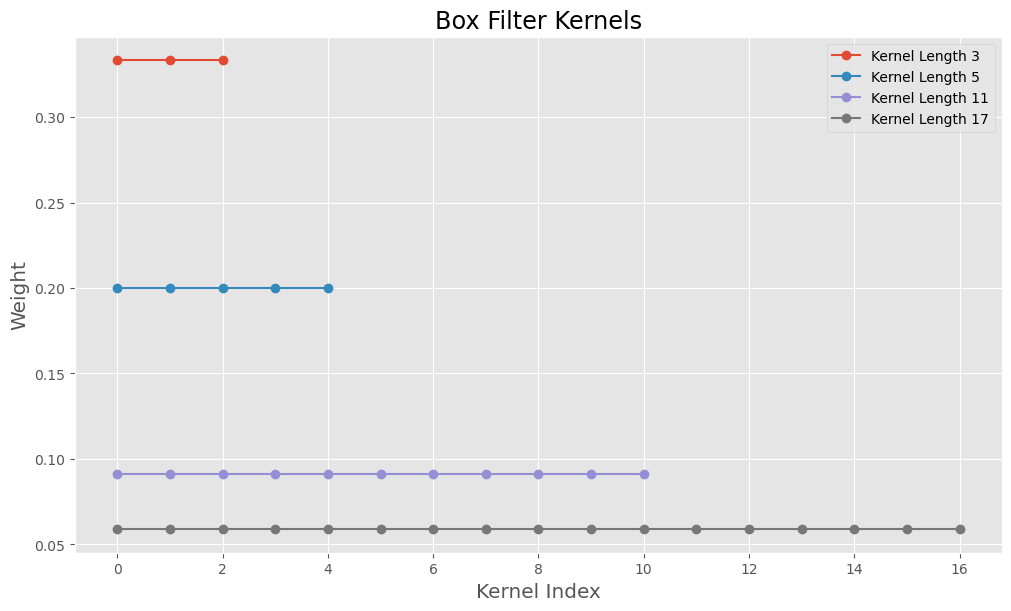

In [74]:
# TODO
# Plot each of the kernels on a single figure

# TODO
# TODO: Plot each of the kernels on a single figure
plt.figure(figsize=(10, 6))

plt.plot(kernel_3, label='Kernel Length 3', marker='o')
plt.plot(kernel_5, label='Kernel Length 5', marker='o')
plt.plot(kernel_11, label='Kernel Length 11', marker='o')
plt.plot(kernel_17, label='Kernel Length 17', marker='o')

plt.title('Box Filter Kernels')
plt.xlabel('Kernel Index')
plt.ylabel('Weight')
plt.grid(True)

plt.legend()

# Show the plot
plt.show()

# Construct Pipelines

In [75]:
""" 
TODO

Set up convenience variables. Use the Z component of both wrists as features.
"""

# Names of the "Z" columns in the raw data frame
selected_names = ['left_wrist_z', 'right_wrist_z']

nselected = len(selected_names)


In [76]:
""" 
TODO

Create a pipeline that:
1. Selects a subset of features specified above
2. Fills gaps within the data using cubic interpolation, and fills
   gaps at the edges of the data with the first or last valid value
3. Computes the derivatives of the selected features. The data are 
   sampled at 50 Hz, therefore, the elapsed time (dt) between 
   the samples is .02 seconds (dt=.02)
"""

from sklearn.pipeline import Pipeline

pipe1 = Pipeline([
 ('selector', DataFrameSelector(selected_names)),
 ('interpolator', InterpolationImputer(method ='linear')),
 ('derivative', DerivativeComputer(attribs=selected_names,dt=0.02))
])


In [77]:
""" TODO
Create a pipeline that:
1. Selects a subset of features specified above
2. Fills gaps within the data using cubic interpolation, and fills
   gaps at the edges of the data with the first or last valid value
3. Smooths the data with a Box Filter. Use kernel size of 11
4. Compute the derivatives of the selected features. The data are 
   sampled at 50 Hz, therefore, the period or elapsed time (dt) between 
   the samples is .02 seconds (dt=.02)
"""
box_kernel = computeBoxWeights(11)

# Define the corrected second pipeline with the derivative computation step included
pipe2 = Pipeline([
    ('selector', DataFrameSelector(selected_names)),  # Step 1: Select features
    ('interpolator', InterpolationImputer(method='cubic')),  # Step 2: Fill gaps using cubic interpolation
    ('smoother', Filter(attribs=selected_names, kernel=box_kernel)),  # Step 3: Smooth data with a Box Filter of size 11
    ('derivative', DerivativeComputer(attribs=selected_names, dt=0.02))  # Step 4: Compute derivatives
])



In [78]:
""" TODO

Use the appropriate pipeline elements to extract the selected 
raw kinematic data and time
"""
dfs = DataFrameSelector(selected_names)


baby_data0 = dfs.fit_transform(baby_data_raw)
timeselector = DataFrameSelector(['time'])
time_df = timeselector.fit_transform(baby_data_raw)



In [79]:
# EXECUTE CELL

baby_data0.describe()

,left_wrist_z,right_wrist_z
count,13454.000000,13514.000000
mean,-0.044767,-0.207248
std,0.060566,0.054263
min,-0.186060,-0.311197
25%,-0.082849,-0.245453
50%,-0.045112,-0.216992
75%,-0.004720,-0.158773
max,0.147053,-0.007693


In [80]:
# EXECUTE CELL
time_df.describe()

,time
count,15000.000000
mean,149.990000
std,86.605427
min,0.000000
25%,74.995000
50%,149.990000
75%,224.985000
max,299.980000


In [81]:
""" TODO

Fit both Pipelines to the data and transform the data
"""
baby_data1 = pipe1.fit_transform(baby_data_raw)
baby_data2 = pipe2.fit_transform(baby_data_raw)

baby_data1.head()

,left_wrist_z,right_wrist_z,d_left_wrist_z,d_right_wrist_z
0,-0.092803,-0.154972,-0.00825,0.00825
1,-0.092968,-0.154807,-0.00970,0.01890
2,-0.093162,-0.154429,-0.00970,0.01830
3,-0.093356,-0.154063,-0.00595,0.00885
4,-0.093475,-0.153886,-0.00915,0.00245


In [82]:
baby_data2.head()

,left_wrist_z,right_wrist_z,d_left_wrist_z,d_right_wrist_z
0,-0.093041,-0.154622,-0.004236,0.005382
1,-0.093126,-0.154515,-0.004809,0.005809
2,-0.093222,-0.154398,-0.005159,0.006359
3,-0.093326,-0.154271,-0.005955,0.006495
4,-0.093445,-0.154141,-0.006341,0.006641


In [83]:
""" 
EXECUTE CELL

Display the summary statistics for the data
from both pipelines
"""
baby_data1.describe() 

,left_wrist_z,right_wrist_z,d_left_wrist_z,d_right_wrist_z
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,-0.044664,-0.207421,0.000002,-0.000520
std,0.060630,0.054196,0.087525,0.066156
min,-0.186060,-0.311197,-1.600800,-0.713900
25%,-0.082856,-0.245478,-0.018100,-0.016150
50%,-0.044753,-0.217102,-0.001650,-0.001100
75%,-0.004492,-0.158881,0.014550,0.012263
max,0.147053,-0.007693,0.810550,0.632800


In [84]:
# EXECUTE CELL

baby_data2.describe() 

,left_wrist_z,right_wrist_z,d_left_wrist_z,d_right_wrist_z
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,-0.044665,-0.207421,0.000002,-0.000521
std,0.060440,0.054066,0.067109,0.054153
min,-0.185867,-0.310861,-0.898173,-0.424532
25%,-0.082901,-0.245549,-0.015248,-0.015839
50%,-0.044479,-0.216919,-0.001916,-0.001082
75%,-0.004457,-0.158829,0.011236,0.011906
max,0.144459,-0.009939,0.619827,0.396433


In [85]:
""" TODO

Display the first 10 values for the data
from each pipeline
"""
baby_data1_head = baby_data1.head(10)

baby_data1_head

,left_wrist_z,right_wrist_z,d_left_wrist_z,d_right_wrist_z
0,-0.092803,-0.154972,-0.00825,0.00825
1,-0.092968,-0.154807,-0.00970,0.01890
2,-0.093162,-0.154429,-0.00970,0.01830
3,-0.093356,-0.154063,-0.00595,0.00885
4,-0.093475,-0.153886,-0.00915,0.00245
5,-0.093658,-0.153837,-0.00385,0.00245
6,-0.093735,-0.153788,-0.00630,0.00470
7,-0.093861,-0.153694,-0.00385,0.00605
8,-0.093938,-0.153573,-0.00875,0.00150
9,-0.094113,-0.153543,-0.00425,0.00160


In [86]:
baby_data2_head = baby_data2.head(10)
baby_data2_head

,left_wrist_z,right_wrist_z,d_left_wrist_z,d_right_wrist_z
0,-0.093041,-0.154622,-0.004236,0.005382
1,-0.093126,-0.154515,-0.004809,0.005809
2,-0.093222,-0.154398,-0.005159,0.006359
3,-0.093326,-0.154271,-0.005955,0.006495
4,-0.093445,-0.154141,-0.006341,0.006641
5,-0.093571,-0.154008,-0.006955,0.006577
6,-0.093711,-0.153877,-0.006514,0.006314
7,-0.093841,-0.153751,-0.005951,0.004964
8,-0.093960,-0.153651,-0.005377,0.004291
9,-0.094067,-0.153566,-0.004941,0.004645


In [87]:
""" TODO
Display the last 10 values for the data
from each pipeline
"""
baby_data1_tail = baby_data1.tail(10)

baby_data1_tail

,left_wrist_z,right_wrist_z,d_left_wrist_z,d_right_wrist_z
14990,-0.092033,-0.308057,-0.0137,-0.043225
14991,-0.092307,-0.308922,0.0000,-0.043225
14992,-0.092307,-0.309786,0.0000,-0.033750
14993,-0.092307,-0.310461,0.0000,-0.014650
14994,-0.092307,-0.310754,0.0000,-0.001100
14995,-0.092307,-0.310776,0.0000,0.002500
14996,-0.092307,-0.310726,0.0000,-0.003600
14997,-0.092307,-0.310798,0.0000,-0.002500
14998,-0.092307,-0.310848,0.0000,-0.004050
14999,-0.092307,-0.310929,0.0000,0.000000


In [88]:
#TODO
baby_data2_tail = baby_data2.tail(10)
baby_data2_tail

,left_wrist_z,right_wrist_z,d_left_wrist_z,d_right_wrist_z
14990,-0.091589,-0.308100,-0.012264,-0.025473
14991,-0.091834,-0.308609,-0.008798,-0.024250
14992,-0.092010,-0.309094,-0.006209,-0.022141
14993,-0.092134,-0.309537,-0.004427,-0.019991
14994,-0.092223,-0.309937,-0.002977,-0.016817
14995,-0.092282,-0.310273,-0.001245,-0.013055
14996,-0.092307,-0.310534,0.000000,-0.009044
14997,-0.092307,-0.310715,0.000000,-0.005195
14998,-0.092307,-0.310819,0.000000,-0.002127
14999,-0.092307,-0.310861,0.000000,0.000000


# Visualize Data

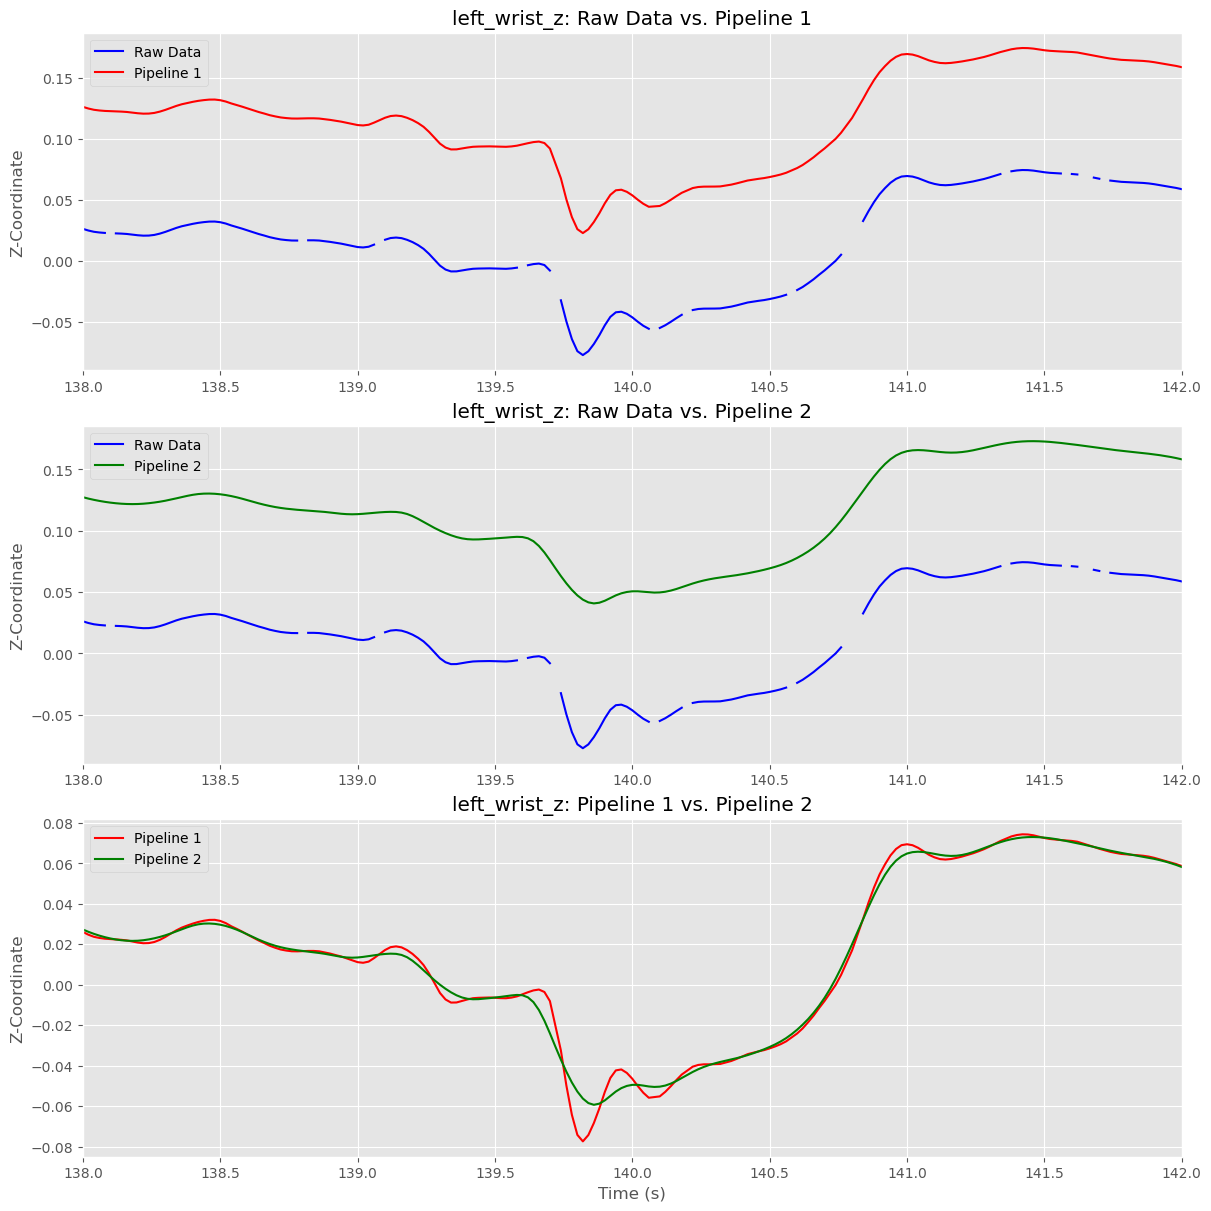

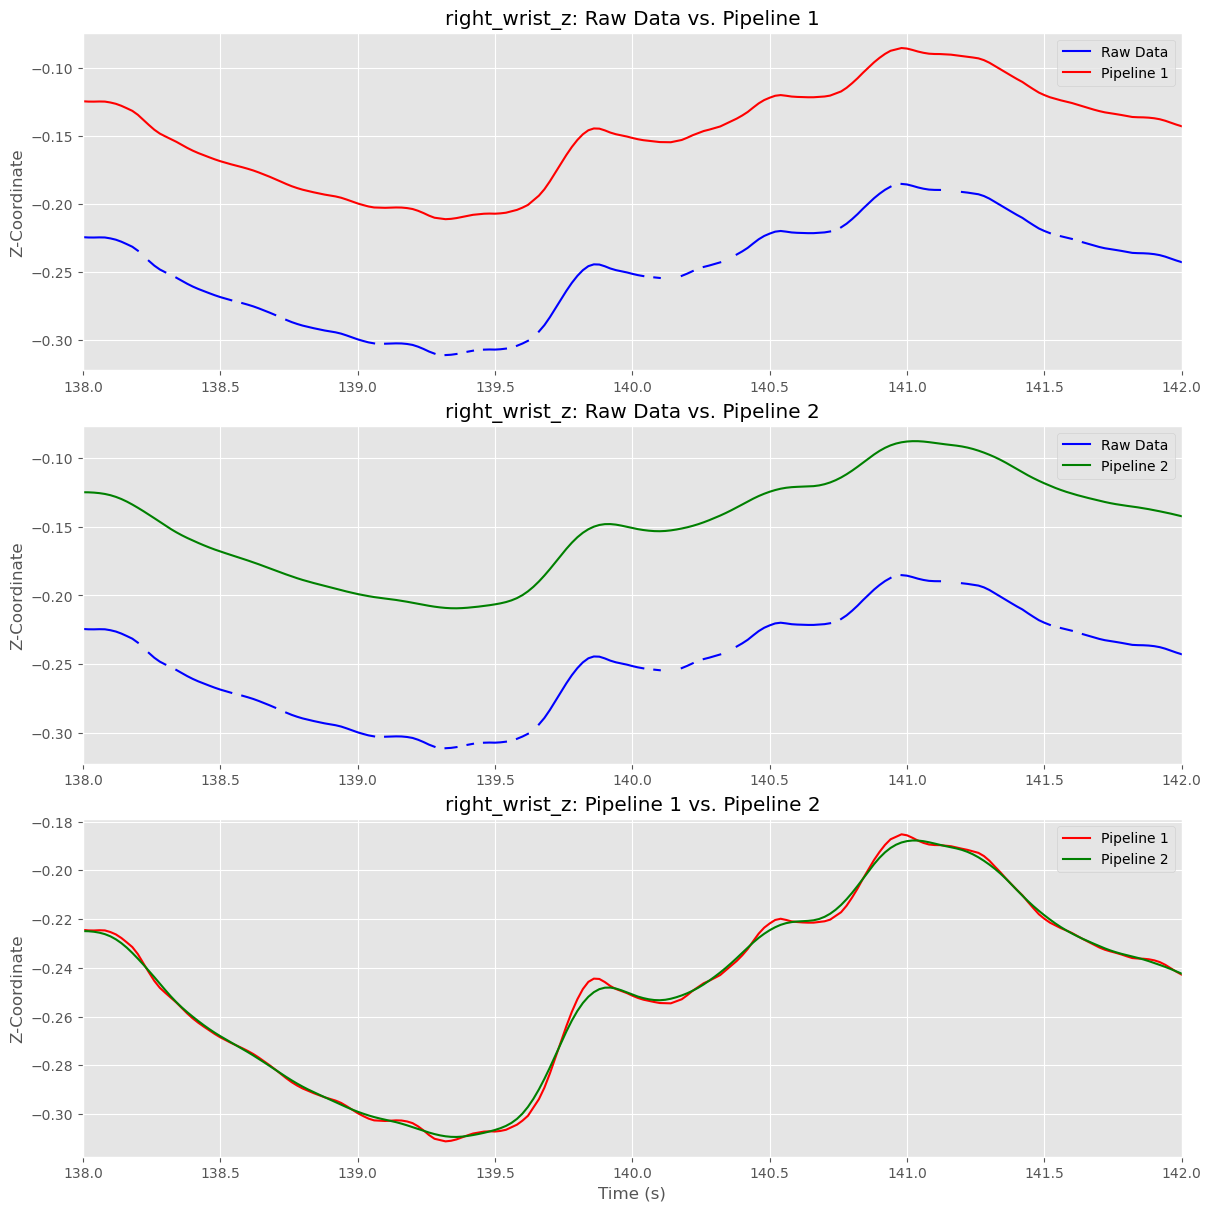

In [89]:
""" TODO
For each selected feature, construct plots comparing the raw data 
to the data from both pipelines. For each selected 
feature, create a figure displaying the raw data and the cleaned 
data in the same subplot. There should be three subplots per feature 
figure. Each subplot is in a separate row.
    subplot(1) will compare the original raw data to the pipeline1 
               pre-processed data.  Vertically offset the two curves
    subplot(2) will compare the original raw data to the pipeline2 
               pre-processed data.  Vertically offset the two curves
    subplot(3) will compare pipeline1 to pipeline2. DO NOT OFFSET
                THE TWO CURVES
    
    Visualize just seconds 138-142.

For all subplots, include axis labels, legends and titles.
"""

plt.style.use('ggplot')
import matplotlib.pyplot as plt

# Define the time window for visualization
time_window = (baby_data_raw['time'] >= 138) & (baby_data_raw['time'] <= 142)

# Select the data within the time window
time = baby_data_raw['time'][time_window]
Xsel_raw = baby_data_raw[selected_names][time_window]
Xsel_clean1 = baby_data1[selected_names][time_window]
Xsel_clean2 = baby_data2[selected_names][time_window]

# Define the x-axis limits
xlim = [time.min(), time.max()]

# Iterate over the features (left_wrist_z and right_wrist_z)
for f, fname in enumerate(selected_names):
    # Create a figure with 3 sub-panels
    fig, axs = plt.subplots(3, 1, figsize=(12, 12))
    axs = axs.ravel()
    
    # Subplot 1: Raw data vs. Pipeline 1
    axs[0].plot(time, Xsel_raw[fname], label='Raw Data', color='blue')
    axs[0].plot(time, Xsel_clean1[fname] + 0.1, label='Pipeline 1', color='red')  # Vertically offset by 0.1
    axs[0].set_xlim(xlim)
    axs[0].set_ylabel('Z-Coordinate')
    axs[0].set_title(f'{fname}: Raw Data vs. Pipeline 1')
    axs[0].legend()

    # Subplot 2: Raw data vs. Pipeline 2
    axs[1].plot(time, Xsel_raw[fname], label='Raw Data', color='blue')
    axs[1].plot(time, Xsel_clean2[fname] + 0.1, label='Pipeline 2', color='green')  # Vertically offset by 0.1
    axs[1].set_xlim(xlim)
    axs[1].set_ylabel('Z-Coordinate')
    axs[1].set_title(f'{fname}: Raw Data vs. Pipeline 2')
    axs[1].legend()

    # Subplot 3: Pipeline 1 vs. Pipeline 2
    axs[2].plot(time, Xsel_clean1[fname], label='Pipeline 1', color='red')
    axs[2].plot(time, Xsel_clean2[fname], label='Pipeline 2', color='green')
    axs[2].set_xlim(xlim)
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Z-Coordinate')
    axs[2].set_title(f'{fname}: Pipeline 1 vs. Pipeline 2')
    axs[2].legend()

    plt.show()

    

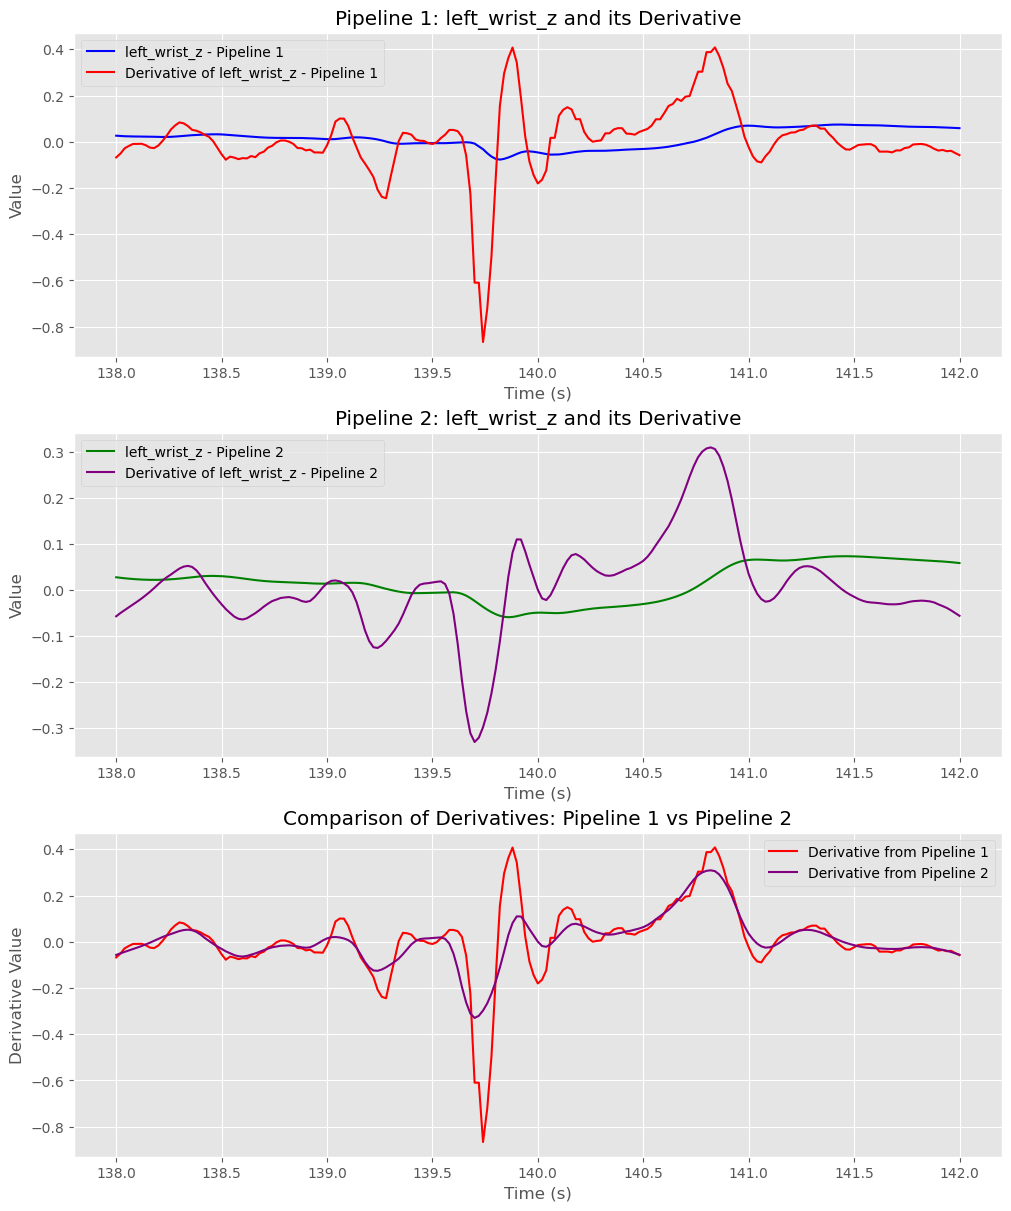

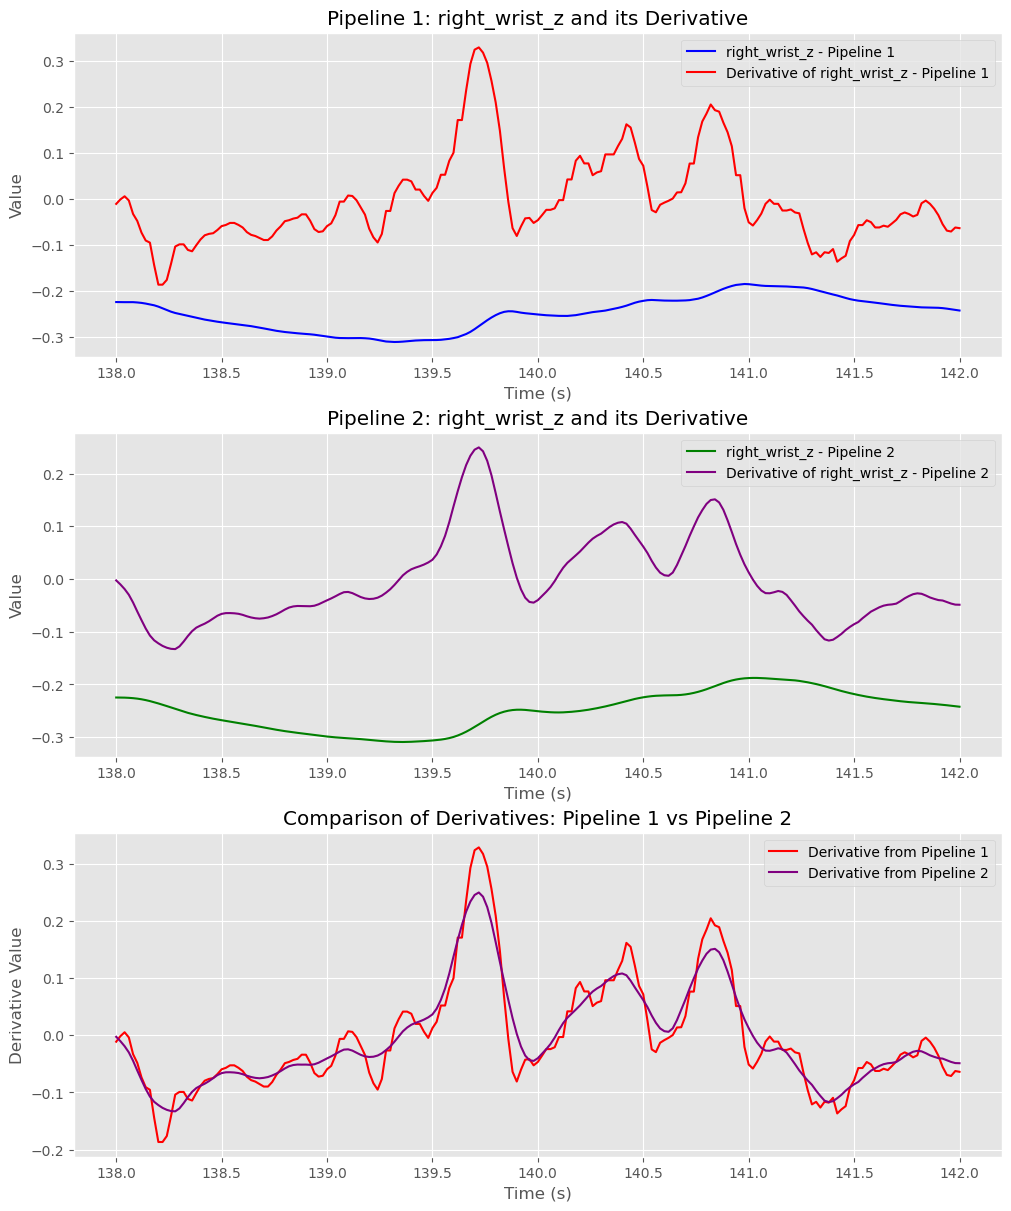

In [90]:
import matplotlib.pyplot as plt

# Time window for visualizing data
time_window = (baby_data_raw['time'] >= 138) & (baby_data_raw['time'] <= 142)

# Extract time and data for the selected window
time = baby_data_raw['time'][time_window]
selected_features = ['left_wrist_z', 'right_wrist_z']
derivatives = ['d_left_wrist_z', 'd_right_wrist_z']

# Prepare data from both pipelines for visualization
data1_features = baby_data1[selected_features][time_window]
data1_derivatives = baby_data1[derivatives][time_window]
data2_features = baby_data2[selected_features][time_window]
data2_derivatives = baby_data2[derivatives][time_window]

# Loop through each feature and its derivatives to create plots
for feature, deriv in zip(selected_features, derivatives):
    plt.figure(figsize=(10, 12))

    # Subplot 1: Feature and derivative from Pipeline 1
    plt.subplot(3, 1, 1)
    plt.plot(time, data1_features[feature], label=f'{feature} - Pipeline 1', color='blue')
    plt.plot(time, data1_derivatives[deriv], label=f'Derivative of {feature} - Pipeline 1', color='red')
    plt.title(f'Pipeline 1: {feature} and its Derivative')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()

    # Subplot 2: Feature and derivative from Pipeline 2
    plt.subplot(3, 1, 2)
    plt.plot(time, data2_features[feature], label=f'{feature} - Pipeline 2', color='green')
    plt.plot(time, data2_derivatives[deriv], label=f'Derivative of {feature} - Pipeline 2', color='purple')
    plt.title(f'Pipeline 2: {feature} and its Derivative')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()

    # Subplot 3: Comparison of derivatives from both pipelines
    plt.subplot(3, 1, 3)
    plt.plot(time, data1_derivatives[deriv], label=f'Derivative from Pipeline 1', color='red')
    plt.plot(time, data2_derivatives[deriv], label=f'Derivative from Pipeline 2', color='purple')
    plt.title(f'Comparison of Derivatives: Pipeline 1 vs Pipeline 2')
    plt.xlabel('Time (s)')
    plt.ylabel('Derivative Value')
    plt.legend()
    plt.show()


# Reflection

Answer the following questions with one or two sentences

_Q1. What is the twentyfifth percentile value for the raw right wrist y dimension?_

The twenty-fifth percentile value for the raw right wrist y dimension is -0.140773


_Q2. Does the output of pipe2 contain any NaNs?_

No, the output of `pipe2` does not contain any NaNs (`False`).


_Q3.  left_wrist_z timeseries plot comparing the two pipelines: Explain why there is a difference between the two curves._

The difference between the two curves for `left_wrist_z` is due to the smoothing effect applied in `pipe2` using a Box Filter. This smoothing reduces the high-frequency noise, resulting in a smoother signal compared to the raw and derivative-corrected data in `pipe1`.



_Q4.  right_wrist_z pipeline 1 figure: explain the relationship between the two curves._

In the `right_wrist_z` pipeline 1 figure, the feature curve represents the position data, and the derivative curve shows the rate of change of the position. The derivative curve peaks where there are sharp changes in the position curve, reflecting the velocity changes at those points.



_Q5.  The pipeline 1 vs 2 derivative of right wrist figure: explain the difference between these two curves._

The differences between the derivatives from `pipe1` and `pipe2` in the right wrist figure are due to the Box Filter smoothing applied in `pipe2`. This smoothing reduces noise and minor fluctuations in the data, resulting in a more stable derivative curve with fewer sharp variations compared to `pipe1`, where the data is less smooth.

